In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords') # download the stop words for preprocessing data
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'nltk'

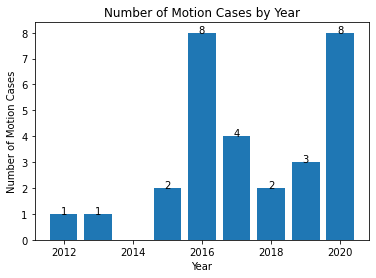

In [3]:
year = [2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020]
case_num = [1, 1, 2, 8, 4, 2, 3, 8]
plt.bar(year, case_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases')
plt.title('Number of Motion Cases by Year')
for i in range(len(case_num)):
    plt.text(year[i], case_num[i], case_num[i], fontsize=10, horizontalalignment='center')
plt.show()

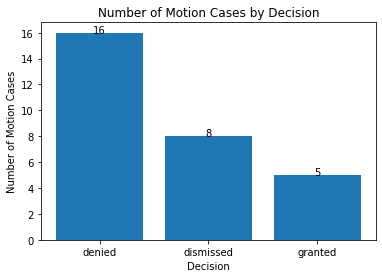

In [4]:
decision = ['denied', 'dismissed', 'granted']
decision_num = [16, 8, 5]
plt.bar(decision, decision_num)
plt.xlabel('Decision')
plt.ylabel('Number of Motion Cases')
plt.title('Number of Motion Cases by Decision')
for i in range(len(decision_num)):
    plt.text(decision[i], decision_num[i], decision_num[i], fontsize=10, horizontalalignment='center')
plt.show()

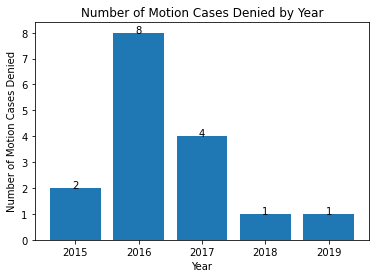

In [5]:
denied_year = ['2015', '2016', '2017', '2018', '2019']
denied_num = [2, 8, 4, 1, 1]
plt.bar(denied_year, denied_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases Denied')
plt.title('Number of Motion Cases Denied by Year')
for i in range(len(denied_year)):
    plt.text(denied_year[i], denied_num[i], denied_num[i], fontsize=10, horizontalalignment='center')
plt.show()

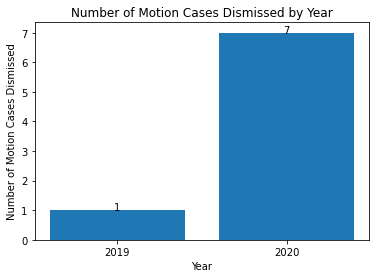

In [6]:
dismiss_year = ['2019', '2020']
dismiss_num = [1, 7]
plt.bar(dismiss_year, dismiss_num)
plt.xlabel('Year')
plt.ylabel('Number of Motion Cases Dismissed')
plt.title('Number of Motion Cases Dismissed by Year')
for i in range(len(dismiss_year)):
    plt.text(dismiss_year[i], dismiss_num[i], dismiss_num[i], fontsize=10, horizontalalignment='center')
plt.show()

In [4]:
# read the dataset
df = pd.read_csv('processed_data.csv')

df = df.fillna("")

# only analyze motion cases
motion = df[df['order'].str.contains("motion")]

denied = motion[motion['order'].str.contains('denied')]
print('Number of denied motion cases:', len(denied))

dismissed = motion[motion['order'].str.contains('dismissed')]
print('Number of dismissed motion cases:', len(dismissed))

granted = motion[motion['order'].str.contains('granted')]
print('Number of granted motion cases:', len(granted))

Number of denied motion cases: 16
Number of dismissed motion cases: 8
Number of granted motion cases: 5


['assist', 'authority', 'center', 'motion', 'classification', 'director', 'dismissed', 'establish', 'filed', 'form', 'human', 'immigration', 'denied', 'victim', 'trafficking']


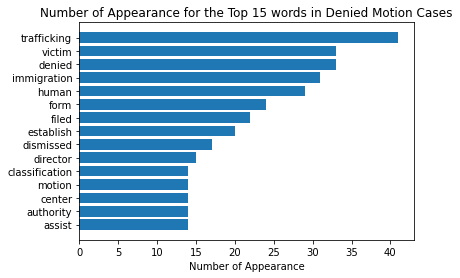

['matter', 'form', 'dismissed', 'dismiss', 'director', 'derivative', 'denied', 'classification', 'center', 'application', 'applicant', 'appeal', 'immigration', 'vermont', 'reconsider']


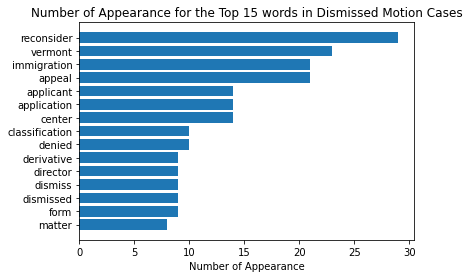

['director', 'form', 'nonimmigrant', 'victim', 'trafficking']


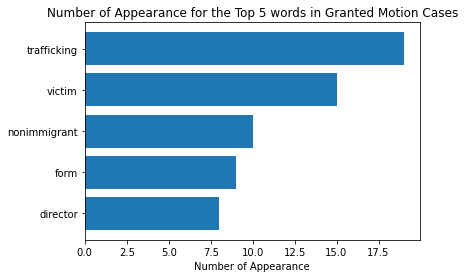

In [5]:
for order_type in [denied, dismissed, granted]:
    text = order_type['description'].astype(str).str.lower().str.replace('[^\w\s]','').str.replace('\d+', '')
    desc = ''
    for each in text:
        desc += each

    text_tokens = word_tokenize(desc)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

    tokens_lemmatized = [WordNetLemmatizer().lemmatize(word) for word in tokens_without_sw]
    
    stopwords_list = stopwords.words('english')

    vect = CountVectorizer(max_df=0.7, min_df=7, stop_words=stopwords_list)

    vected = vect.fit_transform(tokens_lemmatized)
    feature_array = np.array(vect.get_feature_names())
    tfidf_sorting = np.argsort(vected.toarray()).flatten()[::-1]
    
    if order_type is granted:
        n = 5
    else:
        n = 15
    top_words = list(feature_array[tfidf_sorting][:n][::-1])
    top_freqs = list(np.sort(vected.toarray().sum(axis=0))[::-1][:n][::-1])

    plt.barh(top_words, top_freqs)
    plt.xlabel('Number of Appearance')
    if order_type is denied:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Denied'))
    elif order_type is dismissed:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Dismissed'))
    else:
        plt.title('Number of Appearance for the Top {} words in {} Motion Cases'.format(n, 'Granted'))
    plt.show()

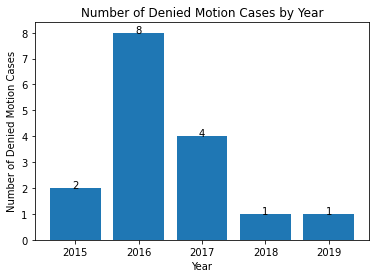

In [3]:
year = [2015, 2016, 2017, 2018, 2019]
case_num = [2, 8, 4, 1, 1]
plt.bar(year, case_num)
plt.xlabel('Year')
plt.ylabel('Number of Denied Motion Cases')
plt.title('Number of Denied Motion Cases by Year')
for i in range(len(case_num)):
    plt.text(year[i], case_num[i], case_num[i], fontsize=10, horizontalalignment='center')
plt.show()

In [ ]:
df = pd.read_csv('processed_data.csv',encoding='latin-1')

In [3]:
df = df.fillna("")

In [4]:
handled = df.loc[df['type'] == 'motion']

In [5]:
# manually obtained counsel information
counsel = ['no','yes','no','no','no','no','no','yes','no','no','no','yes','no','no','no']

In [6]:
granted_handled = handled.loc[[28,60,178,395,454],'description']

In [7]:
granted_description = granted_handled.values

In [8]:
for i in range(len(granted_description)):
    granted_description[i] = granted_description[i].lower()
    granted_description[i] = granted_description[i].replace('.','')

In [10]:
keywords_list = ["victim of a severe form of trafficking in persons","physically present","complied with reasonable requests for assistance", "extreme hardship", "inadmissible", "inadmissibility"]

In [11]:
granted_ocurrences_keywords = [0,0,0,0,0,0]
for i in granted_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        granted_ocurrences_keywords[j] += count

In [12]:
granted_ocurrences_keywords

[5, 2, 1, 0, 0, 0]

In [13]:
granted_totals = zip(keywords_list,granted_ocurrences_keywords)
list(granted_totals)

[('victim of a severe form of trafficking in persons', 5),
 ('physically present', 2),
 ('complied with reasonable requests for assistance', 1),
 ('extreme hardship', 0),
 ('inadmissible', 0),
 ('inadmissibility', 0)]

In [14]:
denied_handled = handled.loc[[26,82,115,138,139,211,213,229,259,281,361,362,363,364,366,451],'description']

In [15]:
denied_description = denied_handled.values

In [16]:
for i in range(len(denied_description)):
    denied_description[i] = denied_description[i].lower()
    denied_description[i] = denied_description[i].replace('.','')

In [17]:
denied_ocurrences_keywords = [0,0,0,0,0,0]
for i in denied_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        denied_ocurrences_keywords[j] += count

In [18]:
denied_ocurrences_keywords

[8, 6, 0, 2, 0, 0]

In [19]:
denied_totals = zip(keywords_list,denied_ocurrences_keywords)
list(denied_totals)

[('victim of a severe form of trafficking in persons', 8),
 ('physically present', 6),
 ('complied with reasonable requests for assistance', 0),
 ('extreme hardship', 2),
 ('inadmissible', 0),
 ('inadmissibility', 0)]

In [25]:
dismissed_handled = handled.loc[[80,81,313,323,351,353,359,370],'description']

In [26]:
dismissed_description = dismissed_handled.values

In [27]:
for i in range(len(dismissed_description)):
    dismissed_description[i] = dismissed_description[i].lower()
    dismissed_description[i] = dismissed_description[i].replace('.','')

In [28]:
dismissed_ocurrences_keywords = [0,0,0,0,0,0]
for i in dismissed_description:
    for j in range(len(keywords_list)):
        count = 0
        count = i.count(keywords_list[j])
        dismissed_ocurrences_keywords[j] += count

In [29]:
dismissed_ocurrences_keywords

[1, 1, 0, 0, 0, 2]

In [31]:
dismissed_totals = zip(keywords_list,dismissed_ocurrences_keywords)
list(dismissed_totals)

[('victim of a severe form of trafficking in persons', 1),
 ('physically present', 1),
 ('complied with reasonable requests for assistance', 0),
 ('extreme hardship', 0),
 ('inadmissible', 0),
 ('inadmissibility', 2)]